In [1]:
# !pip install pdfplumber

### PDF Plumber

In [2]:
import pdfplumber

# Path to your PDF file
pdf_path = "example.pdf"

# Open and extract text
with pdfplumber.open(pdf_path) as pdf:
    all_text = ""
    for page_num, page in enumerate(pdf.pages, start=1):
        text = page.extract_text()
        if text:
            all_text += f"\n--- Page {page_num} ---\n{text}"
        else:
            all_text += f"\n--- Page {page_num} ---\n(No text found)"

# Print or save the extracted text
print(all_text)

# Optionally, save to a .txt file
with open("extracted_text_pdf_plumber.txt", "w", encoding="utf-8") as f:
    f.write(all_text)



--- Page 1 ---
Hello!
This is the content here.


### PyPDF2

In [3]:
# !pip install PyPDF2

In [4]:
import PyPDF2

# Path to your PDF file
pdf_path = "example.pdf"

# Open the PDF file in read-binary mode
with open(pdf_path, "rb") as file:
    reader = PyPDF2.PdfReader(file)
    
    all_text = ""
    for page_num, page in enumerate(reader.pages, start=1):
        text = page.extract_text()
        if text:
            all_text += f"\n--- Page {page_num} ---\n{text}"
        else:
            all_text += f"\n--- Page {page_num} ---\n(No text found)"

# Print or save the extracted text
print(all_text)

# Optionally save to a .txt file
with open("extracted_text_pypdf2.txt", "w", encoding="utf-8") as f:
    f.write(all_text)



--- Page 1 ---
Hello ! 
 
This is the cont ent here.  


In [10]:
!pip install reportlab

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 5.6 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 5.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.platypus import Table, TableStyle
from reportlab.lib import colors

pdf_path = "sample_pdf.pdf"
c = canvas.Canvas(pdf_path, pagesize=A4)
width, height = A4

# Paragraph
text = "This is a sample PDF document. It contains a paragraph, a list, and a table."
c.setFont("Helvetica", 12)
c.drawString(50, height - 50, text)

# List
list_items = ["Item 1: Apples", "Item 2: Bananas", "Item 3: Cherries"]
y = height - 80
for item in list_items:
    c.drawString(60, y, f"- {item}")
    y -= 20

# Table
data = [["Name", "Age", "City"],
        ["Alice", "30", "New York"],
        ["Bob", "25", "London"],
        ["Charlie", "28", "Paris"]]

table = Table(data, colWidths=[100, 50, 100])
table.setStyle(TableStyle([
    ('BACKGROUND', (0,0), (-1,0), colors.gray),
    ('TEXTCOLOR',(0,0),(-1,0),colors.whitesmoke),
    ('ALIGN',(0,0),(-1,-1),'CENTER'),
    ('GRID', (0,0), (-1,-1), 1, colors.black)
]))

table.wrapOn(c, width, height)
table.drawOn(c, 50, y - 100)

c.save()
print(f"PDF created at {pdf_path}")

PDF created at sample_pdf.pdf


In [12]:
import PyPDF2

pdf_path = "sample_pdf.pdf"
all_text = ""

with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page_num, page in enumerate(reader.pages, start=1):
        text = page.extract_text()
        if text:
            all_text += f"\n--- Page {page_num} ---\n{text}"
        else:
            all_text += f"\n--- Page {page_num} ---\n(No text found)"

print(all_text)



--- Page 1 ---
This is a sample PDF document. It contains a paragraph, a list, and a table.
- Item 1: Apples
- Item 2: Bananas
- Item 3: Cherries
Name
Age
City
Alice
30
New York
Bob
25
London
Charlie
28
Paris



In [13]:
import pdfplumber

pdf_path = "sample_pdf.pdf"
all_text = ""

with pdfplumber.open(pdf_path) as pdf:
    for page_num, page in enumerate(pdf.pages, start=1):
        text = page.extract_text()
        if text:
            all_text += f"\n--- Page {page_num} ---\n{text}"
        else:
            all_text += f"\n--- Page {page_num} ---\n(No text found)"

print(all_text)



--- Page 1 ---
This is a sample PDF document. It contains a paragraph, a list, and a table.
- Item 1: Apples
- Item 2: Bananas
- Item 3: Cherries
Name Age City
Alice 30 New York
Bob 25 London
Charlie 28 Paris


In [14]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas

pdf_path = "cv_sample.pdf"
c = canvas.Canvas(pdf_path, pagesize=A4)
width, height = A4

# Set initial position
x = 50
y = height - 50
line_height = 20

def add_line(text, font_size=12, bold=False):
    global y
    c.setFont("Helvetica-Bold" if bold else "Helvetica", font_size)
    c.drawString(x, y, text)
    y -= line_height

# Name and basic details
add_line("Name: John Doe", bold=True)
add_line("Email: john.doe@example.com")
add_line("Phone: +1-234-567-8900")
add_line("Address: 123 Main St, City, Country")
y -= 10  # extra space

# University and Degree
add_line("Education:", bold=True)
add_line("University: University of Example")
add_line("Degree: Bachelor of Science in Computer Science")
y -= 10

# Career
add_line("Career Experience:", bold=True)
add_line("Company: Tech Solutions Ltd.")
add_line("Position: Software Engineer")
add_line("Duration: 2020 - Present")
y -= 10

# Professional certifications
add_line("Professional Certifications:", bold=True)
add_line("Certified Data Scientist (CDS)")
y -= 10

# Skills
add_line("Skills:", bold=True)
skills = ["Python", "Machine Learning", "Data Analysis", "SQL", "Web Development"]
add_line(", ".join(skills))
y -= 10

# Projects
add_line("Projects:", bold=True)
projects = [
    "Project A: Sales Prediction Model",
    "Project B: CV Parsing Tool",
    "Project C: Web App for Data Visualization"
]
for proj in projects:
    add_line(f"- {proj}")

c.save()
print(f"CV PDF created at {pdf_path}")


CV PDF created at cv_sample.pdf


In [15]:
import pdfplumber
import csv

cv_pdf_path = "cv_sample.pdf"
data_dict = {}

with pdfplumber.open(cv_pdf_path) as pdf:
    full_text = ""
    for page in pdf.pages:
        full_text += page.extract_text() + "\n"

# Split lines and extract sections
lines = [line.strip() for line in full_text.split("\n") if line.strip()]

for line in lines:
    if line.startswith("Name:"):
        data_dict["Name"] = line.split("Name:")[1].strip()
    elif line.startswith("Email:"):
        data_dict["Email"] = line.split("Email:")[1].strip()
    elif line.startswith("Phone:"):
        data_dict["Phone"] = line.split("Phone:")[1].strip()
    elif line.startswith("Address:"):
        data_dict["Address"] = line.split("Address:")[1].strip()
    elif line.startswith("University:"):
        data_dict["University"] = line.split("University:")[1].strip()
    elif line.startswith("Degree:"):
        data_dict["Degree"] = line.split("Degree:")[1].strip()
    elif line.startswith("Company:"):
        data_dict["Company"] = line.split("Company:")[1].strip()
    elif line.startswith("Position:"):
        data_dict["Position"] = line.split("Position:")[1].strip()
    elif line.startswith("Duration:"):
        data_dict["Duration"] = line.split("Duration:")[1].strip()
    elif line.startswith("Certified"):
        data_dict["Certifications"] = line.strip()
    elif line.startswith("Skills:"):
        data_dict["Skills"] = line.split("Skills:")[1].strip()
    elif line.startswith("- Project"):
        if "Projects" not in data_dict:
            data_dict["Projects"] = []
        data_dict["Projects"].append(line.strip("- ").strip())

# Convert list of projects to a single string
if "Projects" in data_dict:
    data_dict["Projects"] = "; ".join(data_dict["Projects"])

# Write to CSV
csv_path = "cv_data.csv"
with open(csv_path, "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=data_dict.keys())
    writer.writeheader()
    writer.writerow(data_dict)

print(f"Data extracted and saved to {csv_path}")

Data extracted and saved to cv_data.csv


In [ ]:
import pdfplumber

pdf_path = "PDFs/DA 2009 - Course Specifications.pdf"
all_text = ""

with pdfplumber.open(pdf_path) as pdf:
    for page_num, page in enumerate(pdf.pages, start=1):
        text = page.extract_text()
        if text:
            all_text += f"\n--- Page {page_num} ---\n{text}"
        else:
            all_text += f"\n--- Page {page_num} ---\n(No text found)"

print(all_text)


TypeError: 'PDF' object is not subscriptable

In [13]:
# Split lines and extract sections
lines = [line.strip() for line in all_text.split("\n") if line.strip()]
lines


['--- Page 1 ---',
 'DA 2009 – Data Collection Methods II Course Specifications',
 'Course Code DA 2009',
 'Course Name Data Collection Methods II',
 'Credit Value 2C',
 'Core/Optional Core',
 'Prerequisites None',
 'Hourly Breakdown Theory Practical Independent Notional',
 'Learning',
 '20 20 60 100',
 'Course Aim:',
 'To provide critical awareness of fundamental concepts and tools relevant to data collection from the web.',
 'Intended Learning Outcomes:',
 'After the successful completion of the course, the student will be able to',
 '● CLO1: demonstrate awareness of fundamental concepts in data collection from the web',
 '● CLO2: identify and apply suitable tools and techniques to extract data from the web',
 '● CLO3: practice ethical standards and professional integrity in collecting data from the web',
 'Course Content:',
 'Introduction to web based data collection; different forms of data available in the web; collect data using',
 'python: introduction to python modules, basic H

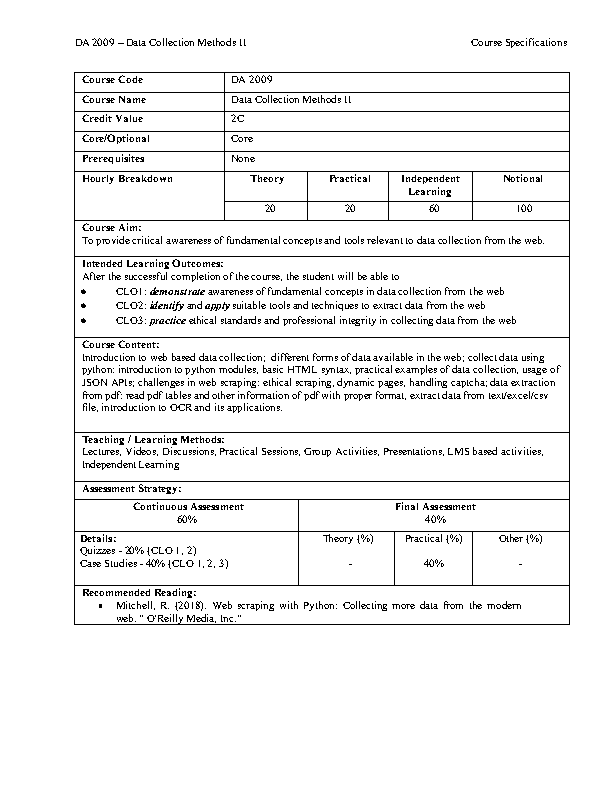

In [ ]:
import pdfplumber

pdf_path = "PDFs/DA 2009 - Course Specifications.pdf"
all_text = ""

with pdfplumber.open(pdf_path) as pdf:
    all_text = pdf.pages[0].extract_text()

im = pdf.pages[0].to_image()
im


In [17]:
import pdfplumber

pdf_path = "PDFs/DA 2009 - Course Specifications.pdf"
all_text = ""

with pdfplumber.open(pdf_path) as pdf:
    # all_text = pdf.pages[1].extract_text()
    for i in range(len(pdf.pages)):
        all_tables = pdf.pages[i].extract_table()
        print(f"Page {i+1}: {all_tables}")

all_tables



Page 1: [['Course Code', 'DA 2009', None, None, None, None, None], ['Course Name', 'Data Collection Methods II', None, None, None, None, None], ['Credit Value', '2C', None, None, None, None, None], ['Core/Optional', 'Core', None, None, None, None, None], ['Prerequisites', 'None', None, None, None, None, None], ['Hourly Breakdown', 'Theory', None, 'Practical', 'Independent\nLearning', None, 'Notional'], [None, '20', None, '20', '60', None, '100'], ['Course Aim:\nTo provide critical awareness of fundamental concepts and tools relevant to data collection from the web.', None, None, None, None, None, None], ['Intended Learning Outcomes:\nAfter the successful completion of the course, the student will be able to\n● CLO1: demonstrate awareness of fundamental concepts in data collection from the web\n● CLO2: identify and apply suitable tools and techniques to extract data from the web\n● CLO3: practice ethical standards and professional integrity in collecting data from the web', None, None, 

[['Course Code', 'DA 2009', None, None, None, None, None],
 ['Course Name', 'Data Collection Methods II', None, None, None, None, None],
 ['Credit Value', '2C', None, None, None, None, None],
 ['Core/Optional', 'Core', None, None, None, None, None],
 ['Prerequisites', 'None', None, None, None, None, None],
 ['Hourly Breakdown',
  'Theory',
  None,
  'Practical',
  'Independent\nLearning',
  None,
  'Notional'],
 [None, '20', None, '20', '60', None, '100'],
 ['Course Aim:\nTo provide critical awareness of fundamental concepts and tools relevant to data collection from the web.',
  None,
  None,
  None,
  None,
  None,
  None],
 ['Intended Learning Outcomes:\nAfter the successful completion of the course, the student will be able to\n● CLO1: demonstrate awareness of fundamental concepts in data collection from the web\n● CLO2: identify and apply suitable tools and techniques to extract data from the web\n● CLO3: practice ethical standards and professional integrity in collecting data fro

In [19]:
import pdfplumber

pdf_path = "PDFs/DA 2009 - Week 1.pdf"
all_text = ""

with pdfplumber.open(pdf_path) as pdf:
    # all_text = pdf.pages[1].extract_text()
    for i in range(len(pdf.pages)):
        all_tables = pdf.pages[i].extract_table()
        print(f"Page {i+1}: {all_tables}")

Cannot set gray non-stroke color because /'P13' is an invalid float value
Cannot set gray non-stroke color because /'P76' is an invalid float value


Page 1: None
Page 2: None
Page 3: None
Page 4: None
Page 5: None
Page 6: None
Page 7: [['Aspect', 'Surveys (Primary Data Collection)', 'Web-Based Data Collection'], ['Source', 'Often directly from respondents Existing online data (websites, social media)', None], ['Cost & Speed', 'Higher cost and slower speed Low cost and fast, often real-time', None], ['Control', 'Full control over questions and data\nLimited control since data is pre-generated\nformat', None], ['Ethics', 'Requires informed consent and Privacy and scraping legality as declared by\nethical approval the website', None], ['Use Cases', 'Trend monitoring, large-scale behavior\nIn-depth insights, causal analysis\nanalysis', None]]
Page 8: None
Page 9: None
Page 10: None
Page 11: None
Page 12: None
Page 13: None
Page 14: None
Page 15: None
Page 16: None
Page 17: None
Page 18: None
Page 19: None
Page 20: None
Page 21: None
Page 22: None
Page 23: None
Page 24: None
Page 25: None
Page 26: None
Page 27: None
Page 28: None


Cannot set gray non-stroke color because /'P231' is an invalid float value


Page 29: None
Page 30: None
Page 31: None
Page 32: None
Page 33: None
Page 34: None
